<a href="https://colab.research.google.com/github/RofiqAulia/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Praktikum

1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


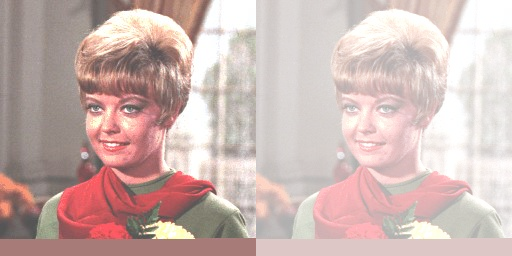

In [8]:
from __future__ import print_function
import numpy as np
import argparse
import cv2 as cv
from google.colab.patches import cv2_imshow

# Coba baca gambar
female1 = cv.imread('/content/drive/MyDrive/PCVK/Images/girl.jpg')

# Cek apakah gambar berhasil dibaca
if female1 is None:
    print("Error: Gambar tidak ditemukan atau tidak dapat dibaca.")
else:
    images = female1.copy()

    # Fungsi untuk menyesuaikan gamma
    def adjust_gamma(image, gamma=1.0):
        invGamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
        return cv.LUT(image, table)

    print(' Gamma Correction pada citra ')
    print('-----------------------------')

    # Input gamma dari pengguna
    try:
        gamma = float(input('Masukkan nilai Gamma: '))
    except ValueError:
        print('Error, bukan angka.')
        gamma = 1.0  # Gunakan nilai default jika input salah

    # Menyesuaikan gamma
    adjusted = adjust_gamma(image=images, gamma=gamma)

    # Tampilkan gambar asli dan yang sudah disesuaikan
    cv2_imshow(np.hstack([images, adjusted]))


2. Buat Simulasi Image Depth

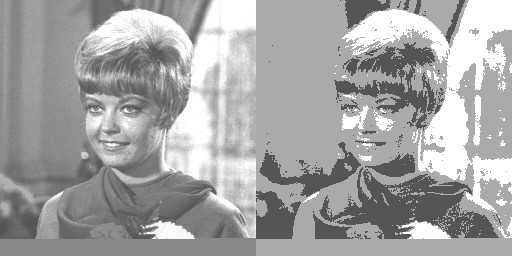

In [10]:
imgTgs2 = female1.copy()

bit_depth = 2
level = 255/ (pow (2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/girl.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape,original.dtype)

for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    depth_image[i,j] = round((original[i,j]/level))*level

final_frame = cv.hconcat((original,depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

In [58]:
import glob
import cv2 as cv
import numpy as np

cv_img = []
imgTgs3 = []
for img_path in glob.glob('/content/drive/MyDrive/PCVK/Images/galaxy.jpeg'):
    n = cv.imread(img_path)

    if n is None:
        print(f"Failed to load image: {img_path}")
    else:
        imgTgs3.append(n)

print(f"Loaded {len(imgTgs3)} images.")


Loaded 1 images.


In [60]:
def PNSR(img1,img2):
  mse = np.mean((img1-img2)**2)
  if mse == 0:
    return 100
  max_pixel = 255.0
  psnr = 20*np.log10(max_pixel/np.sqrt(mse))
  return psnr

def averageDenoising(index):
  avgDen = np.zeros_like(imgTgs3[0], dtype=np.float32)
  for i in range(index):
    avgDen += imgTgs3[i].astype(np.float32)

  return avgDen

5 Jumlah Citra di Average

30.18043940230544


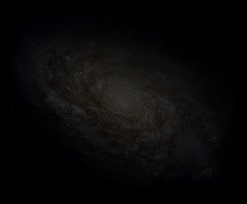

In [61]:
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab
def gamma_correction(img, gamma=2.2):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

def averageDenoising(index):
    # Ensure that the index doesn't exceed the number of images in imgTgs3
    if index > len(imgTgs3):
        index = len(imgTgs3)

    avgDen = np.zeros_like(imgTgs3[0], dtype=np.float32)
    for i in range(index):
        avgDen += imgTgs3[i].astype(np.float32)

    return avgDen

# Make sure imgTgs3 contains enough images
if len(imgTgs3) > 0:
    avgDen5 = averageDenoising(5)
    avgDen5 /= 5
    avgDen5 = np.uint8(avgDen5)
    print(PNSR(imgTgs3[0], avgDen5))

    # Display the image in Colab
    cv2_imshow(avgDen5)
else:
    print("No images available in imgTgs3.")


10 jumlah citra di average

29.743111802490905


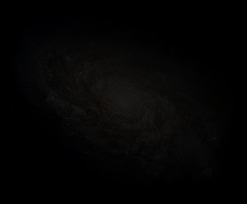

In [64]:
# Make sure imgTgs3 contains enough images
if len(imgTgs3) > 0:
    average10 = averageDenoising(10)
    average10 /= 10
    average10 = np.uint8(average10)
    print(PNSR(imgTgs3[0], average10))

    # Display the image in Colab
    cv2_imshow(average10)
else:
    print("No images available in imgTgs3.")

20 jumlah citra di average

29.709750309318046


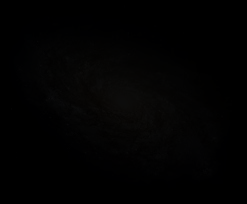

In [63]:
avgDen20 = averageDenoising(20)
avgDen20 /= 20
avgDen20 = np.uint8(avgDen20)
print(PNSR(imgTgs3[0],avgDen20))
cv2_imshow(avgDen20)

40 jumlah citra di average

29.672917899971374


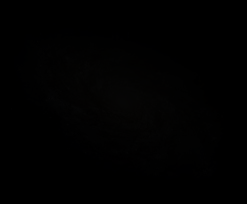

In [68]:
avegDen40 = averageDenoising(40)
avegDen40 /= 40
avegDen40 = np.uint8(avegDen40)
print(PNSR(imgTgs3[0],avegDen40))
cv2_imshow(avegDen40)

80 jumlah citra di average

29.735479917901486


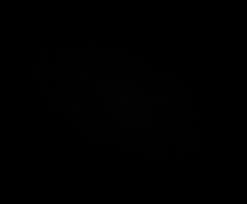

In [69]:
avgDen80 = averageDenoising(80)
avgDen80 /= 80
avgDen80 = np.uint8(avgDen80)
print(PNSR(imgTgs3[0],avgDen80))
cv2_imshow(avgDen80)

100 jumlah citra di average

29.73396819817689


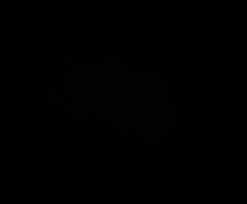

In [70]:
avgDen100 = averageDenoising(100)
avgDen100 /= 100
avgDen100 = np.uint8(avgDen100)
print(PNSR(imgTgs3[0],avgDen100))
cv2_imshow(avgDen100)

# New Section